<a href="https://colab.research.google.com/github/sharclark/Ecommerce-Shipping-Project/blob/main/Ecom_Shipping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Shar Clark

Date: 3/14/23

Title: Ecom Shipping Analysis

Description: Predicting on time shipping within ecommerce

# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Train 2.csv')
df.head()
# source: https://www.kaggle.com/code/santhoshtsk/ecommerce-shipping-eda-prediction

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.shape

print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 10999 rows, and 12 columns.
The rows represent 10999 observations, and the columns represent 11 features and 1 target variable.


In [6]:
df.describe()
# there are no outliers in this data set that need to be dealt with

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [7]:
print(f'There are {df.duplicated().sum()} missing values in this data set')

There are 0 missing values in this data set


In [8]:
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [9]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [10]:
df.nunique()
# drop ID since they are all unique values; rest of columns are needed

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [11]:
del df['ID']
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [12]:
df.info()
#all types look correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [13]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

In [14]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

# all object columns have no categorical inconsistencies to fix

- Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64



- Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64



- Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64



- Gender:
F    5545
M    5454
Name: Gender, dtype: int64





#Univariate Visuals - For the target and all features

In [15]:
df.columns
#target = reached on time

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## Warehouse Block

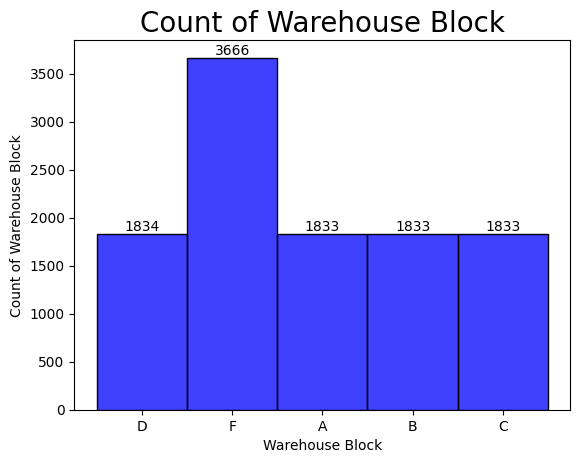

In [28]:
ax = sns.histplot(x = 'Warehouse_block', 
              data = df, 
              color = 'blue')
ax.set(xlabel='Warehouse Block', ylabel='Count of Warehouse Block')
ax.set_title( "Count of Warehouse Block" , size = 20 )
ax.bar_label(ax.containers[0])
plt.show()



The F block has the highest amount of shipments in the data set. 

## Mode of Shipment

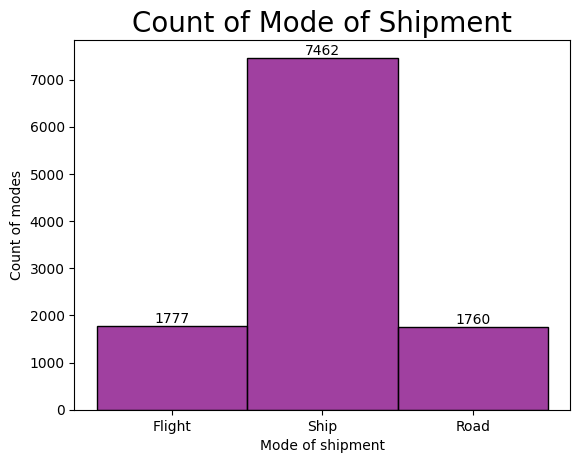

In [27]:
ax = sns.histplot(x = 'Mode_of_Shipment', 
              data = df, 
              color = 'purple')
ax.set(xlabel='Mode of shipment', ylabel='Count of modes')
ax.set_title( "Count of Mode of Shipment" , size = 20 )
ax.bar_label(ax.containers[0])
plt.show()


The most common mode of transportation for this data set is via Ship. 

##Product Importance

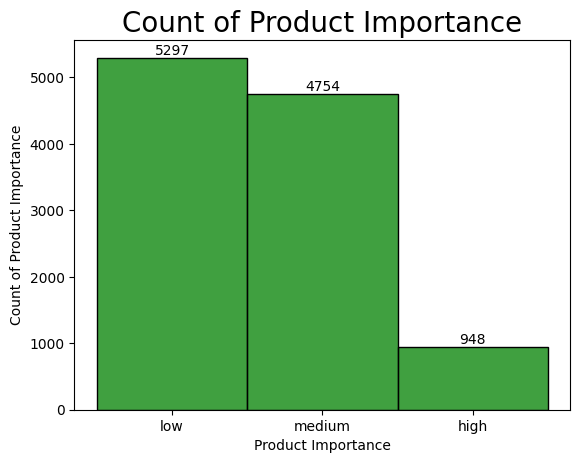

In [26]:
ax = sns.histplot(x = 'Product_importance', 
              data = df, 
              color = 'green')
ax.set(xlabel='Product Importance', ylabel='Count of Product Importance')
ax.set_title( "Count of Product Importance" , size = 20 )
ax.bar_label(ax.containers[0])
plt.show()


The most common product importance is low importance. Most of the data points(shipments) in this data set are of low and medium importance. Shipments marked high importance are the lowest quantity in the data set. 

## Gender

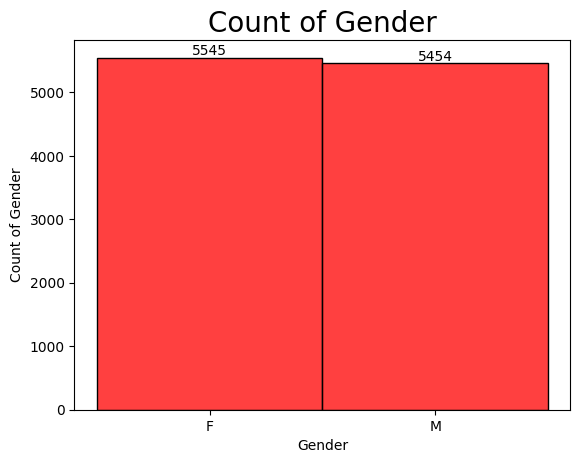

In [25]:
ax = sns.histplot(x = 'Gender', 
              data = df, 
              color = 'red')
ax.set(xlabel='Gender', ylabel='Count of Gender')
ax.set_title( "Count of Gender" , size = 20 )
ax.bar_label(ax.containers[0])
plt.show()


There is a very even split of male and female for this data set. 

## Customer Care Calls

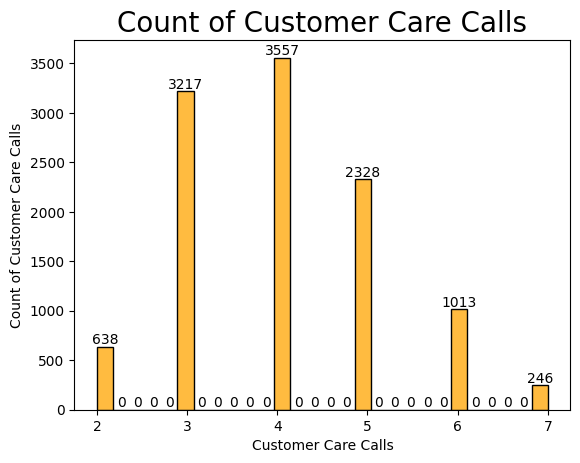

In [45]:
ax = sns.histplot(x = 'Customer_care_calls', 
              data = df, 
              color = 'orange')
ax.set(xlabel='Customer Care Calls', ylabel='Count of Customer Care Calls')
ax.set_title( "Count of Customer Care Calls" , size = 20 )
ax.bar_label(ax.containers[0])
plt.show()


The most common count of customer care calls is 4. There are 3557 entries/shipments that have 4 customer care calls. The lowest grouped amount of times customer care was called was 7, where there were only 246 entries. 

## Customer Rating

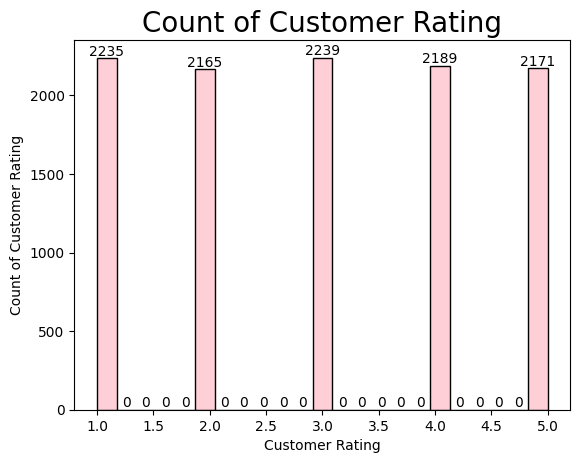

In [46]:
ax = sns.histplot(x = 'Customer_rating', 
              data = df, 
              color = 'pink')
ax.set(xlabel='Customer Rating', ylabel='Count of Customer Rating')
ax.set_title( "Count of Customer Rating" , size = 20 )
ax.bar_label(ax.containers[0])
plt.show()


There is a very even distribution of customer ratings across this data set. There is no one rating that stands out on its own. 

## Cost of Product

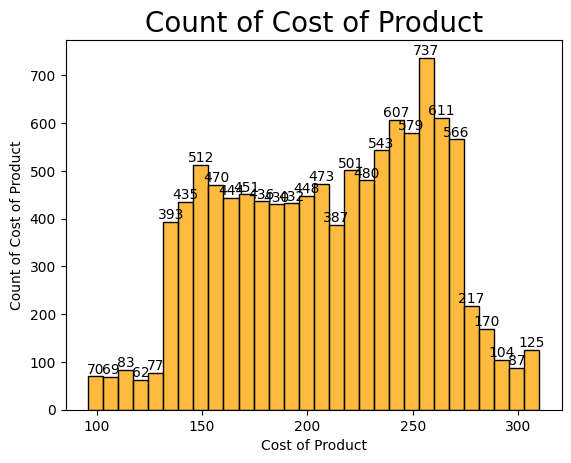

In [48]:
ax = sns.histplot(x = 'Cost_of_the_Product', 
              data = df, 
              color = 'orange')
ax.set(xlabel='Cost of Product', ylabel='Count of Cost of Product')
ax.set_title( "Count of Cost of Product" , size = 20 )
ax.bar_label(ax.containers[0])
plt.show()


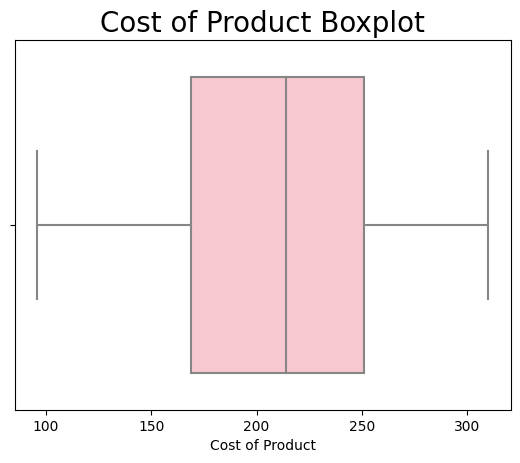

In [49]:
ax = sns.boxplot(x = 'Cost_of_the_Product', 
              data = df, 
              color = 'pink')
ax.set(xlabel='Cost of Product', )
ax.set_title( "Cost of Product Boxplot" , size = 20 )

plt.show()


The most common cost of product is 245. There are 110 shipments that the product cost 245. The boxplot shows that the bulk of the data have the cost of the product between around 175 and 250. This also shows that there are not any huge outliers in this data set. 

## Prior Purchases

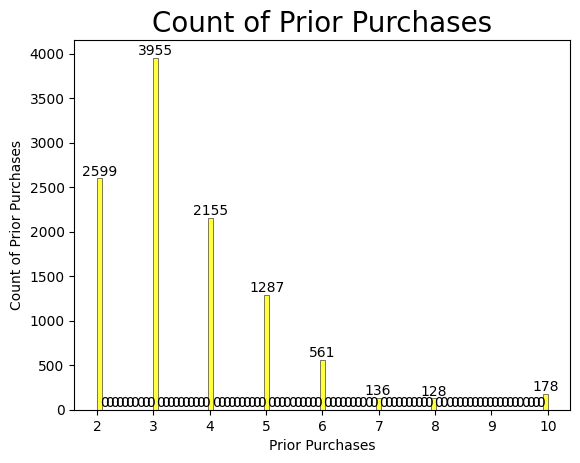

In [50]:
ax = sns.histplot(x = 'Prior_purchases', 
              data = df, 
              color = 'yellow')
ax.set(xlabel='Prior Purchases', ylabel='Count of Prior Purchases')
ax.set_title( "Count of Prior Purchases" , size = 20 )
ax.bar_label(ax.containers[0])
plt.show()


The most common about of prior purchases is 3. This means that most of the shipments are shipments that the customer/client have purchased in the past. 

##Discount Offered

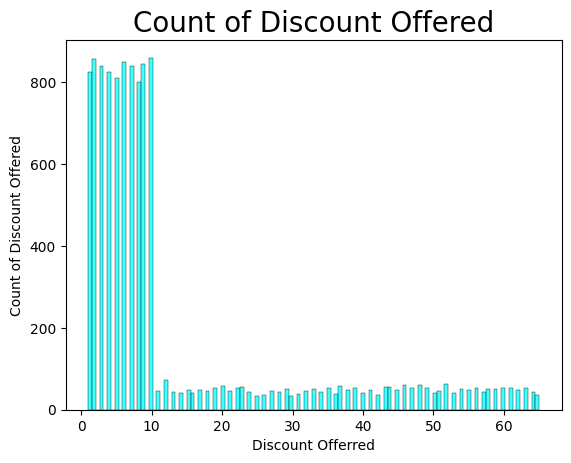

30     34
25     34
42     35
26     36
65     36
     ... 
3     840
9     845
6     849
2     858
10    860
Name: Discount_offered, Length: 65, dtype: int64

In [51]:
ax = sns.histplot(x = 'Discount_offered', 
              data = df, 
              color = 'cyan')
ax.set(xlabel='Discount Offerred', ylabel='Count of Discount Offered')
ax.set_title( "Count of Discount Offered" , size = 20 )

plt.show()
df['Discount_offered'].value_counts().sort_values()

The most common discount offered was 10%. From 0-10% was the most common amount of discount offered. After a 10% discount the counts for other discounts are very similar, all in the range of 0-72; while the 10% discount range totals in the 800's. 

##Weight in Grams

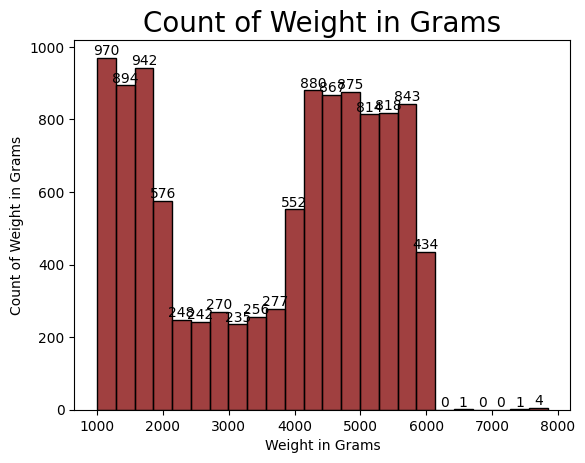

In [52]:
ax = sns.histplot(x = 'Weight_in_gms', 
              data = df, 
              color = 'maroon')
ax.set(xlabel='Weight in Grams', ylabel='Count of Weight in Grams')
ax.set_title( "Count of Weight in Grams" , size = 20 )
ax.bar_label(ax.containers[0])
plt.show()

There are two distinct groupings of weight in grams of the shipments. Between 4k grams and 6k grams and then another group of smallers shipments, around 1k to 2k. 

## Reached.on.Time_Y.N

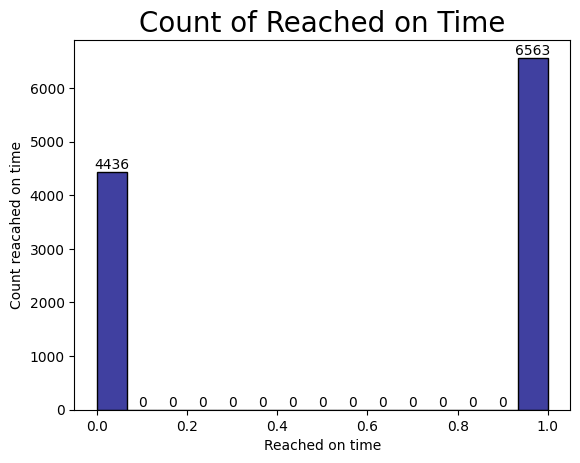

In [53]:
ax = sns.histplot(x = 'Reached.on.Time_Y.N', 
              data = df, 
              color = 'navy')
ax.set(xlabel='Reached on time', ylabel='Count reacahed on time')
ax.set_title( "Count of Reached on Time" , size = 20 )
ax.bar_label(ax.containers[0])
plt.show()


More often than not, the shipments reached their destination on time. However, 40% of the time they did not reach their destination on time. 

## Correlation Heatmap

In [39]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<ipython-input-40-623df0344a9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues', annot = True);


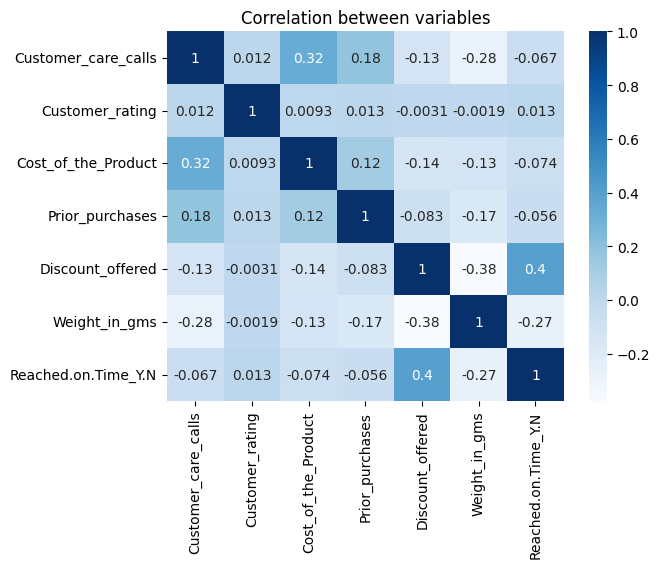

In [40]:
sns.heatmap(df.corr(), cmap = 'Blues', annot = True);
plt.title('Correlation between variables');

- The highest correlations in this data set are discount offered and whether or not the shipment was reached on time. This is the target that we are trying to predict, so we know that discounts offerred is highly correlated to whether or not the shipment was reached on time. 

- The second highest correlation that is in this data is between the cost of the product and customer calls. The higher the cost of the product, the more customer care calls there were. That absolutely makes sense because those high value shipments have more people checking on them because they end up being more important. 

- Prior purchases and customer care calls also has a strong positive correlation. Recurring customers are more likely to call into customer service than other customers who are not prior customers. 

- It is also important to point out that none of the varaibles have a strong negative correlation. 

In [41]:
mode_cost_avg = df.groupby('Mode_of_Shipment')['Cost_of_the_Product'].mean()
mode_cost_avg
#all 3 have very similar average costs

Mode_of_Shipment
Flight    209.306697
Road      210.475568
Ship      210.343072
Name: Cost_of_the_Product, dtype: float64

In [42]:
whblock_avgcost = df.groupby('Warehouse_block')['Cost_of_the_Product'].mean()
whblock_avgcost
#warehouse block B holds the highest average cost of products

Warehouse_block
A    208.767594
B    212.159302
C    211.191489
D    210.907852
F    209.077196
Name: Cost_of_the_Product, dtype: float64

In [43]:
whblock_avgwgt = df.groupby('Warehouse_block')['Weight_in_gms'].mean().sort_values()
whblock_avgwgt
#the F and C block have the highest average weight compared to the rest of the blocks

Warehouse_block
A    3615.448991
D    3628.846783
B    3635.701037
C    3641.331151
F    3641.387616
Name: Weight_in_gms, dtype: float64

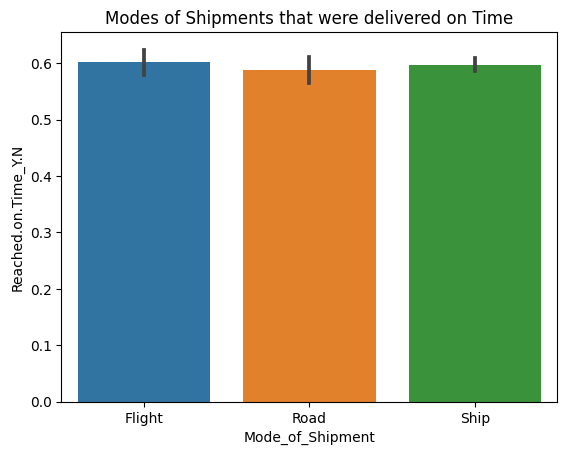

All 3 modes of transport have very similar rates of being on time.


In [65]:
sns.barplot(data=df, x='Mode_of_Shipment', y='Reached.on.Time_Y.N', order=['Flight', 'Road', 'Ship']).set(title='Modes of Shipments that were delivered on Time')

plt.show()
print('All 3 modes of transport have very similar rates of being on time.')

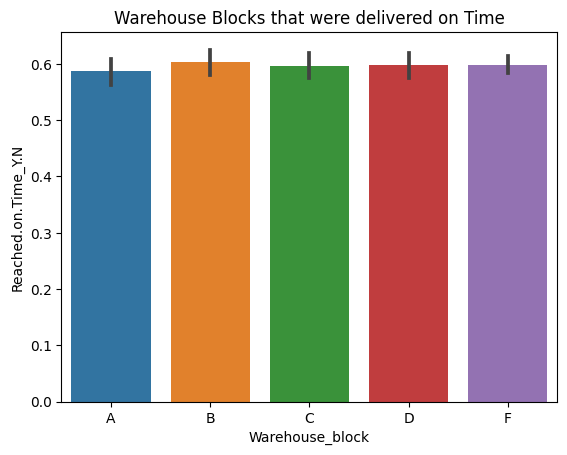

Block A had the lowest rate of on time shipments out of all the blocks.


In [61]:
sns.barplot(data=df, x='Warehouse_block', y='Reached.on.Time_Y.N', order=['A', 'B', 'C', 'D', 'F']).set(title='Warehouse Blocks that were delivered on Time')
plt.show()
print('Block A had the lowest rate of on time shipments out of all the blocks.')

In [70]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [84]:
ontime_weight_gms = df.groupby('Reached.on.Time_Y.N')['Weight_in_gms'].mean()
ontime_weight_gms

Reached.on.Time_Y.N
0    4168.668395
1    3272.640104
Name: Weight_in_gms, dtype: float64

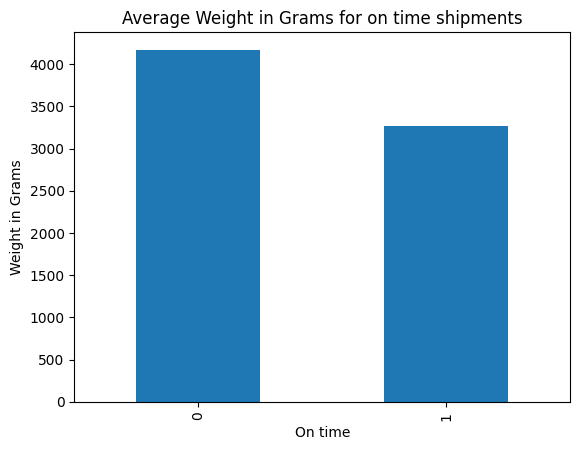

The heavier the shipment, the more likely it is to be late.


In [87]:
ontime_weight_gms.plot(kind='bar')
plt.title('Average Weight in Grams for on time shipments')
plt.xlabel("On time")
plt.ylabel("Weight in Grams")
plt.show()
print('The heavier the shipment, the more likely it is to be late.')

In [78]:
ontime_Customer_Rating = df.groupby('Reached.on.Time_Y.N')['Customer_rating'].mean()
ontime_Customer_Rating

Reached.on.Time_Y.N
0    2.967989
1    3.005790
Name: Customer_rating, dtype: float64

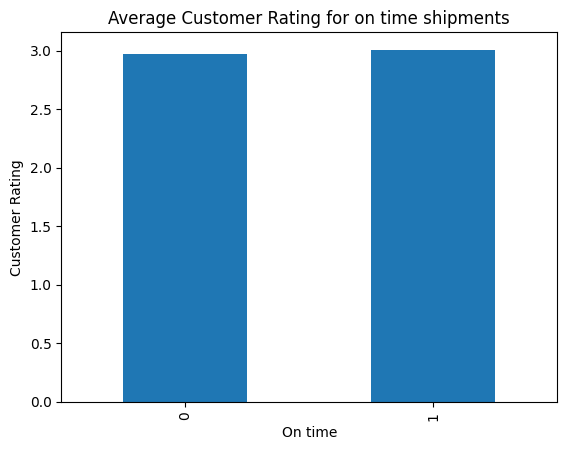

If the shipment was on time, the rating was higher.


In [81]:
ontime_Customer_Rating.plot(kind='bar')
plt.title('Average Customer Rating for on time shipments')
plt.xlabel("On time")
plt.ylabel("Customer Rating")
plt.show()
print('If the shipment was on time, the rating was higher.')

In [72]:
ontime_Prior_Purchase = df.groupby('Reached.on.Time_Y.N')['Prior_purchases'].mean()
ontime_Prior_Purchase


Reached.on.Time_Y.N
0    3.670424
1    3.498095
Name: Prior_purchases, dtype: float64

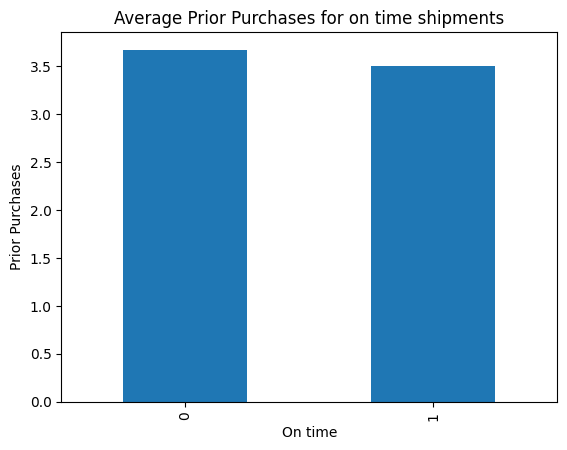

If the shipment was not on time, more discounts were offered.


In [79]:
ontime_Prior_Purchase.plot(kind='bar')
plt.title('Average Prior Purchases for on time shipments')
plt.xlabel("On time")
plt.ylabel("Prior Purchases")
plt.show()
print('If the shipment was not on time, more discounts were offered.')

In [74]:
ontime_discount = df.groupby('Reached.on.Time_Y.N')['Discount_offered'].mean()
ontime_discount
#The average discount for on time shipments is 18%

Reached.on.Time_Y.N
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64

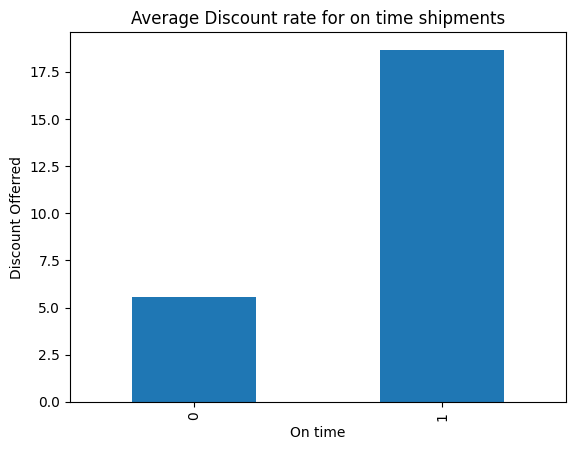

There was the highest discount with the shipments that were on time.


In [73]:
ontime_discount.plot(kind='bar')
plt.title('Average Discount rate for on time shipments')
plt.xlabel("On time")
plt.ylabel("Discount Offerred")
plt.show()
print('There was the highest discount with the shipments that were on time.')

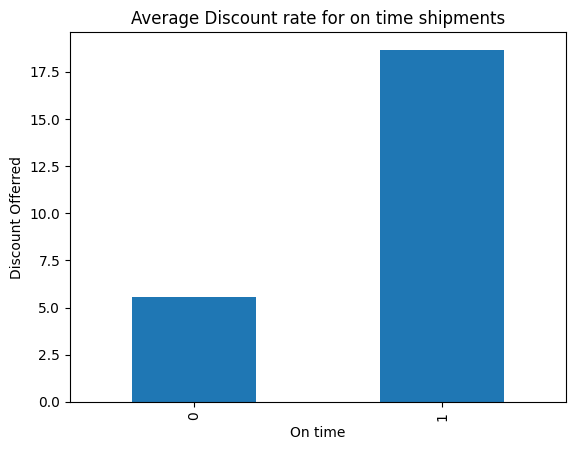

There was the highest discount with the shipments that were on time.


# Modeling

In [88]:
#imports for modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)
# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [89]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [91]:
df['Reached.on.Time_Y.N'].value_counts(normalize = True)
# 60/40 split of data. Ontime = 1, not on time 0. Very low baseline for modeling.

1    0.596691
0    0.403309
Name: Reached.on.Time_Y.N, dtype: float64

### Encoding

In [92]:
df = df.rename(columns={'Gender': 'is_female',
                        'Reached.on.Time_Y.N': 'On_Time', 
                        })

In [93]:
df['Warehouse_block'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'F':4 }, inplace=True)
df['Mode_of_Shipment'].replace({'Ship':1, 'Flight':0, 'Road':2}, inplace =True)
df['Product_importance'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
df['is_female'].replace({'F':1, 'M':0}, inplace=True)


In [94]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,is_female,Discount_offered,Weight_in_gms,On_Time
0,3,0,4,2,177,3,0,1,44,1233,1
1,4,0,4,5,216,2,0,0,59,3088,1
2,0,0,2,2,183,4,0,0,48,3374,1
3,1,0,3,3,176,4,1,0,10,1177,1
4,2,0,2,2,184,3,1,1,46,2484,1


## KNN Modeling

In [95]:
target = 'On_Time'
X = df.drop(columns = [target])
y= df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [113]:
knn = KNeighborsClassifier()
scaler = StandardScaler()


In [115]:
from sklearn.decomposition import PCA
pca= PCA(n_components = .95)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)



In [116]:
pca.fit(scaled_df)

PCA(n_components=0.95)

In [117]:
knn_pipe = make_pipeline(scaler,pca, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [118]:
#get predictions to get metrics
knn_train_pred = knn_pipe.predict(X_train)
knn_test_pred = knn_pipe.predict(X_test)

PreTune KNN Train Report
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      3336
           1       0.82      0.79      0.81      4913

    accuracy                           0.77      8249
   macro avg       0.77      0.77      0.77      8249
weighted avg       0.78      0.77      0.78      8249

PreTune KNN Train Confusion Matrix


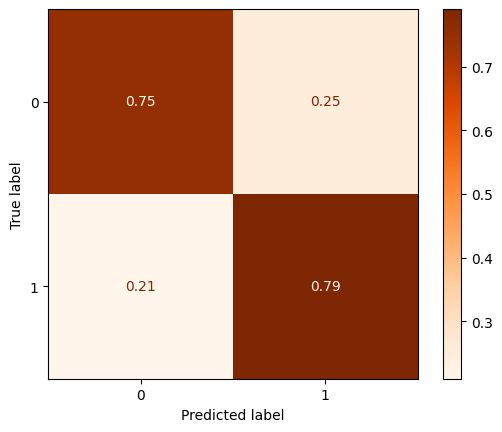

In [119]:
#pre train confusion matrix and classification report
print('PreTune KNN Train Report')
print(classification_report(y_train, knn_train_pred))

print('PreTune KNN Train Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_pred, cmap = 'Oranges', normalize ='true');

PreTune KNN Test Report
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1100
           1       0.72      0.67      0.69      1650

    accuracy                           0.64      2750
   macro avg       0.63      0.64      0.64      2750
weighted avg       0.65      0.64      0.65      2750

PreTune KNN Test Confusion Matrix


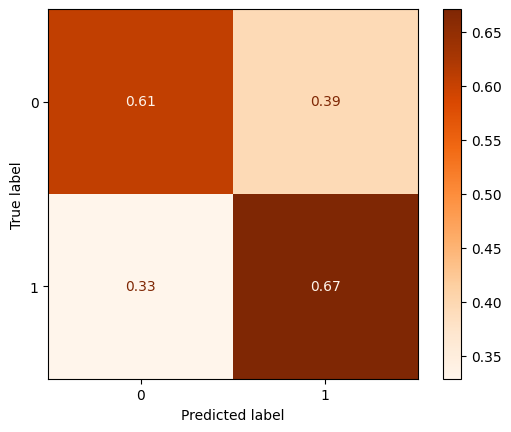

In [120]:
print('PreTune KNN Test Report')
print(classification_report(y_test, knn_test_pred))

print('PreTune KNN Test Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_pred, cmap = 'Oranges', normalize= 'true');

In [121]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('pca', PCA(n_components=0.95)),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'pca': PCA(n_components=0.95),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.95,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [122]:
knnpipe_paramgrid = {'kneighborsclassifier__n_neighbors': [1,2,3,4,5,6,7,8,9,10],  
                     'kneighborsclassifier__leaf_size': [30, 50, 100, 15, 20, 5],                    
                     'kneighborsclassifier__weights': ['uniform', 'distance'],  
                     }

In [123]:
knn_pipe_gs = GridSearchCV(knn_pipe, knnpipe_paramgrid)

knn_pipe_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [30, 50, 100, 15,
                                                             20, 5],
                         'kneighborsclassifier__n_neighbors': [1, 2, 3, 4, 5, 6,
                                                               7, 8, 9, 10],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']})

In [106]:
print(knn_pipe_gs.best_params_)


{'kneighborsclassifier__leaf_size': 30, 'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__weights': 'distance'}


In [107]:
knnpredtrain_TUNED = knn_pipe_gs.predict(X_train)
knnpredtest_TUNED = knn_pipe_gs.predict(X_test)

PostTune KNN Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      4913

    accuracy                           1.00      8249
   macro avg       1.00      1.00      1.00      8249
weighted avg       1.00      1.00      1.00      8249

PostTune KNN Train Confusion Matrix


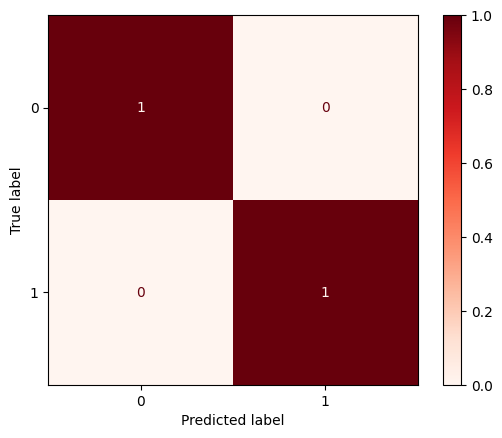

In [109]:
#knn tuned metrics
print('PostTune KNN Train Report')
print(classification_report(y_train, knnpredtrain_TUNED))

print('PostTune KNN Train Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, knnpredtrain_TUNED, cmap = 'Reds', normalize ='true');

PostTune KNN Test Report
              precision    recall  f1-score   support

           0       0.55      0.64      0.59      1100
           1       0.73      0.65      0.69      1650

    accuracy                           0.65      2750
   macro avg       0.64      0.65      0.64      2750
weighted avg       0.66      0.65      0.65      2750

PostTune KNN Test Confusion Matrix


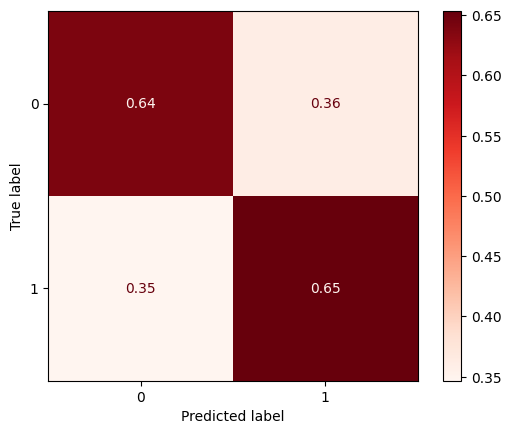

In [110]:
print('PostTune KNN Test Report')
print(classification_report(y_test, knnpredtest_TUNED))

print('PostTune KNN Test Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, knnpredtest_TUNED, cmap = 'Reds', normalize= 'true');

## XGB Modeling

In [124]:
target = 'On_Time'
X = df.drop(columns = [target])
y= df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [125]:
from xgboost import XGBClassifier


In [126]:
xgb = XGBClassifier()

In [127]:
xgb_pipe = make_pipeline(scaler,pca,xgb)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [128]:
#get predictions to get metrics
xgb_train_pred = xgb_pipe.predict(X_train)
xgb_test_pred = xgb_pipe.predict(X_test)

PreTune XGB Train Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3336
           1       0.97      0.94      0.95      4913

    accuracy                           0.94      8249
   macro avg       0.94      0.95      0.94      8249
weighted avg       0.95      0.94      0.94      8249

PreTune XGB Train Confusion Matrix


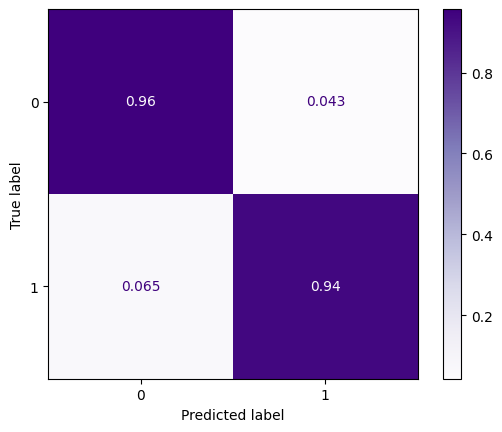

In [129]:
#pre train confusion matrix and classification report for xgb
print('PreTune XGB Train Report')
print(classification_report(y_train, xgb_train_pred))

print('PreTune XGB Train Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, xgb_train_pred, cmap = 'Purples', normalize ='true')

PreTune XGB Test Report
              precision    recall  f1-score   support

           0       0.54      0.61      0.57      1100
           1       0.71      0.65      0.68      1650

    accuracy                           0.63      2750
   macro avg       0.63      0.63      0.63      2750
weighted avg       0.64      0.63      0.64      2750

PreTune XGB Test Confusion Matrix


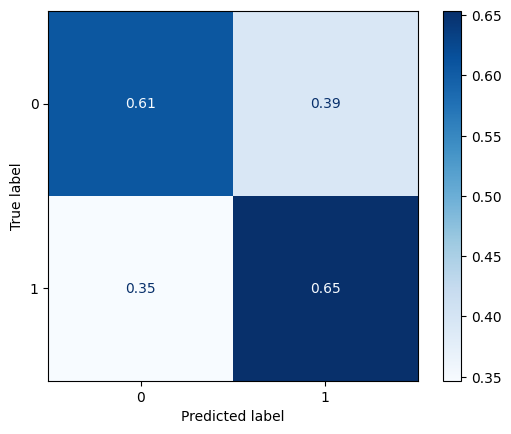

In [130]:
print('PreTune XGB Test Report')
print(classification_report(y_test, xgb_test_pred))

print('PreTune XGB Test Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, xgb_test_pred, cmap = 'Blues', normalize= 'true')

In [131]:
xgb_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('pca', PCA(n_components=0.95)),
  ('xgbclassifier',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 predictor=None, random_state=None, ...))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'pca': PCA(n_components=0.95),
 'x

In [134]:
xgb_paramgrid = {'xgbclassifier__n_estimators':[100, 1000, 500],  
                 'xgbclassifier__max_depth': [1, 4, 10],  
                 'xgbclassifier__gamma':[0,1,10]}

In [135]:
xgb_pipe_gs = GridSearchCV(xgb_pipe, xgb_paramgrid)

xgb_pipe_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__gamma': [0, 1, 10],
                         'xgbclassifier__max_depth': [1, 4, 10],
                         'xgbclassifier__n_estimators': [100, 1000, 500]})

In [138]:
print(xgb_pipe_gs.best_params_)

{'xgbclassifier__gamma': 10, 'xgbclassifier__max_depth': 4, 'xgbclassifier__n_estimators': 100}


In [139]:
xgbpredtrain_TUNED = xgb_pipe_gs.predict(X_train)
xgbpredtest_TUNED = xgb_pipe_gs.predict(X_test)

PostTune XGB Train Report
              precision    recall  f1-score   support

           0       0.56      0.91      0.70      3336
           1       0.90      0.52      0.66      4913

    accuracy                           0.68      8249
   macro avg       0.73      0.72      0.68      8249
weighted avg       0.76      0.68      0.68      8249

PostTune XGB Train Confusion Matrix


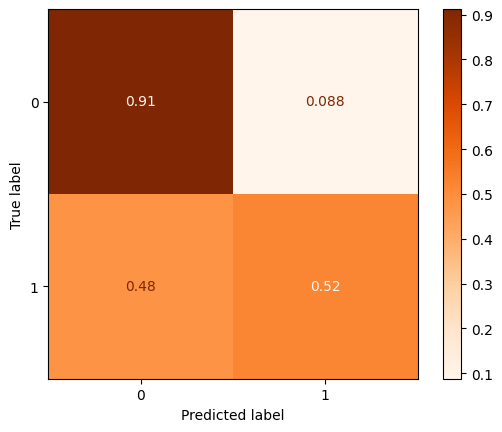

In [140]:
#XGB tuned metrics
print('PostTune XGB Train Report')
print(classification_report(y_train, xgbpredtrain_TUNED))


print('PostTune XGB Train Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, xgbpredtrain_TUNED, cmap = 'Oranges', normalize ='true');

PostTune XGB Test Report
              precision    recall  f1-score   support

           0       0.55      0.90      0.68      1100
           1       0.88      0.51      0.64      1650

    accuracy                           0.66      2750
   macro avg       0.71      0.70      0.66      2750
weighted avg       0.75      0.66      0.66      2750

PostTune KNN Test Confusion Matrix


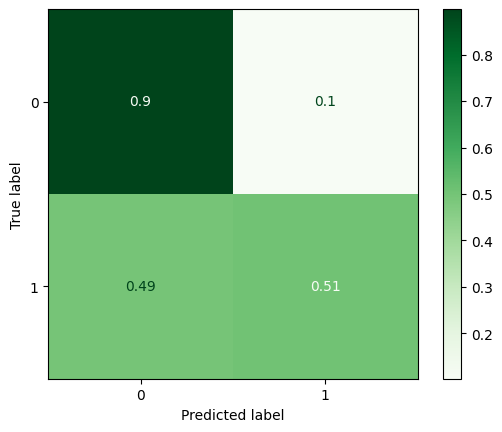

In [141]:
print('PostTune XGB Test Report')
print(classification_report(y_test, xgbpredtest_TUNED))

print('PostTune KNN Test Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, xgbpredtest_TUNED, cmap = 'Greens', normalize= 'true');

## Random Forest Modeling

In [142]:
target = 'On_Time'
X = df.drop(columns = [target])
y= df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [143]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()

In [144]:
rfc_pipe = make_pipeline(scaler, pca, rfc)
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier', RandomForestClassifier())])

In [145]:
rfc_train_pred = rfc_pipe.predict(X_train)
rfc_test_pred = rfc_pipe.predict(X_test)

PreTune Random Forest Classifier Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      4913

    accuracy                           1.00      8249
   macro avg       1.00      1.00      1.00      8249
weighted avg       1.00      1.00      1.00      8249

PreTune Random Forest Classifier Train Confusion Matrix


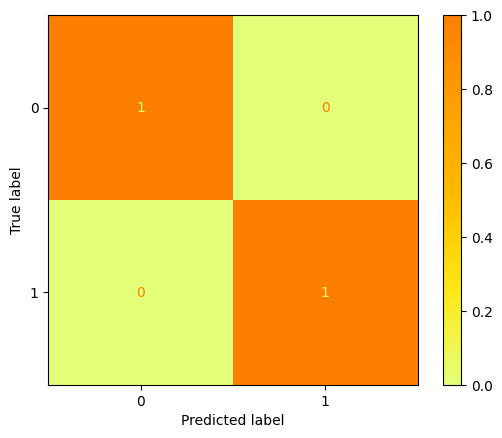

In [149]:
print('PreTune Random Forest Classifier Train Report')
print(classification_report(y_train, rfc_train_pred))

print('PreTune Random Forest Classifier Train Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, rfc_train_pred, cmap = 'Wistia', normalize ='true');

PreTune Random Forest Classifier Test Report
              precision    recall  f1-score   support

           0       0.57      0.68      0.62      1100
           1       0.75      0.65      0.70      1650

    accuracy                           0.66      2750
   macro avg       0.66      0.66      0.66      2750
weighted avg       0.68      0.66      0.67      2750

PreTune Random Forest Classifier Test Confusion Matrix


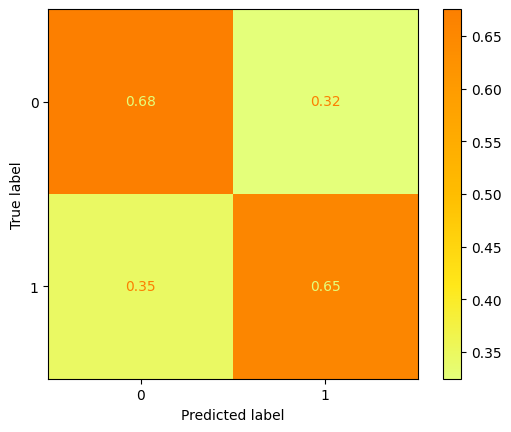

In [151]:
print('PreTune Random Forest Classifier Test Report')
print(classification_report(y_test, rfc_test_pred))

print('PreTune Random Forest Classifier Test Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, rfc_test_pred, cmap = 'Wistia', normalize= 'true');

In [152]:
rfc_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('pca', PCA(n_components=0.95)),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'pca': PCA(n_components=0.95),
 'randomforestclassifier': RandomForestClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 0.95,
 'pca__n_oversamples': 10,
 'pca__power_iteration_normalizer': 'auto',
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max

In [153]:
rfc_paramgrid = {'randomforestclassifier__n_estimators':[100, 500,1000],  
                 'randomforestclassifier__max_depth': [1, 50, 100],   
                 'randomforestclassifier__min_samples_leaf':[1, 4, 8]}

In [154]:
rfc_pipe_gs = GridSearchCV(rfc_pipe, rfc_paramgrid)

rfc_pipe_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=0.95)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [1, 50, 100],
                         'randomforestclassifier__min_samples_leaf': [1, 4, 8],
                         'randomforestclassifier__n_estimators': [100, 500,
                                                                  1000]})

In [155]:
print(rfc_pipe_gs.best_params_)

{'randomforestclassifier__max_depth': 100, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__n_estimators': 1000}


In [156]:
rfcpredtrain_TUNED = rfc_pipe_gs.predict(X_train)
rfcpredtest_TUNED = rfc_pipe_gs.predict(X_test)

PostTune Random Forest Classifier Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3336
           1       1.00      1.00      1.00      4913

    accuracy                           1.00      8249
   macro avg       1.00      1.00      1.00      8249
weighted avg       1.00      1.00      1.00      8249

PostTune Random Forest Classifier Train Confusion Matrix


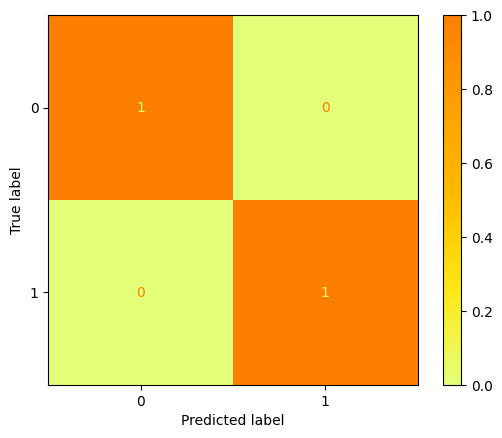

In [157]:
print('PostTune Random Forest Classifier Train Report')
print(classification_report(y_train, rfcpredtrain_TUNED))

print('PostTune Random Forest Classifier Train Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_train, rfcpredtrain_TUNED, cmap = 'Wistia', normalize ='true')

PostTune Random Forest Classifier Test Report
              precision    recall  f1-score   support

           0       0.56      0.65      0.60      1100
           1       0.74      0.66      0.69      1650

    accuracy                           0.65      2750
   macro avg       0.65      0.65      0.65      2750
weighted avg       0.67      0.65      0.66      2750

PostTune Random Forest Classifier Test Confusion Matrix


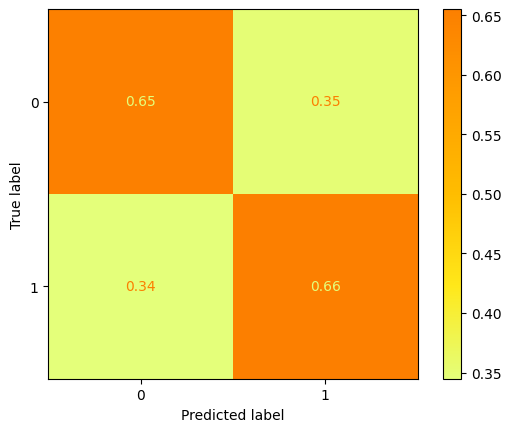

In [158]:
print('PostTune Random Forest Classifier Test Report')
print(classification_report(y_test, rfcpredtest_TUNED))

print('PostTune Random Forest Classifier Test Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, rfcpredtest_TUNED, cmap = 'Wistia', normalize= 'true')